In [1]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/balbi/Downloads/pyMorfologik-master'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pymorfologik import Morfologik
from pymorfologik.parsing import ListParser

import numpy as np
from __future__ import print_function
import string

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
result_df = pd.read_csv('restaurant_reviews-analisis-all-2.csv')
result_df = result_df.reset_index()
result_df.loc[result_df.detectedEmotion == 'neutral', 'detectedEmotion'] = "negative"
result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']

In [58]:
def get_length(text):
    return len(text)

def get_length_bin(length):
    return round(length / 10)

def get_score(result):
    return 1 if result else 0

def prepereDataForPlot(result_df):
    result_df['score'] = map(get_score, result_df['correct_guess'])
    #create group with 10 elements
    result_df['text_length_bin'] = map(get_length_bin, result_df['words'])    
    return result_df

In [59]:
def createPlotTextLength(result_df):
    # data to plot
    n_groups = round(result_df['text_length_bin'].max())
    
    grouped = result_df.groupby('text_length_bin', as_index=False).mean()
    sum_elements = grouped.words
    means_words = grouped.words/sum_elements
    means_lemmatisation = grouped.wordsAfterLemmatisation/sum_elements
    means_emotions = grouped.wordsFound/sum_elements

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(grouped))
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Lenght of text')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, (0, 50, 100, 150, 200, 250, 300, 350, 400, 450))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [60]:
def createPlotRates(result_df):
    # data to plot
    result_df = result_df.round({'rate': 0})
    n_groups = result_df.rate.max()
    
    grouped = result_df.groupby('rate', as_index=False).mean()
    means_words = grouped.words/grouped.words
    means_lemmatisation = grouped.wordsAfterLemmatisation/grouped.words
    means_emotions = grouped.wordsFound/grouped.words

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(grouped))
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Rates')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, ('1', '2', '3', '4', '5'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [61]:
def createPlotByScore(data):
    grouped = data.groupby('words', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.words
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Lenght of text')
    plt.ylabel('Efficacy')
    
    fig.show()

In [62]:
#zaleznosc oceny od wykrytej emocji
def createPlotByRate(data):
    data = data.round({'rate': 0})   
    grouped = data.groupby('rate', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.rate
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Rate')
    plt.ylabel('Efficacy')

    fig.show()

In [63]:
def createPlotByWordsFound(result):
    grouped = result.groupby('wordsFound', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.wordsFound
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    plt.xlabel('Found words in Slowosiec')
    plt.ylabel('Efficacy')
    
    fig.show()

In [64]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [65]:
def getResults(result_df):
    return result_df.groupby('correct_guess').size()

In [66]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

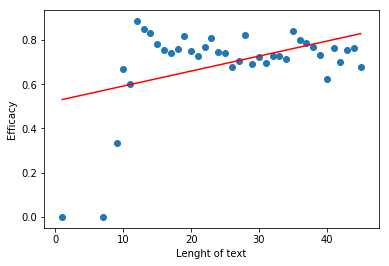

In [69]:
createPlotByScore(result_df)

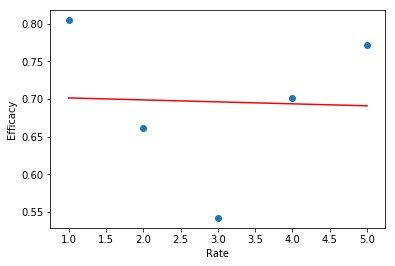

In [70]:
createPlotByRate(result_df)

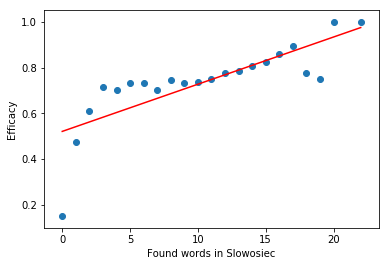

In [71]:
createPlotByWordsFound(result_df)

In [68]:
getResults(result_df)

correct_guess
False    1900
True     5019
dtype: int64

In [67]:
result_df = prepereDataForPlot(result_df)

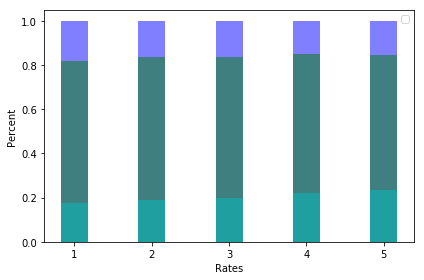

In [72]:
createPlotRates(result_df)

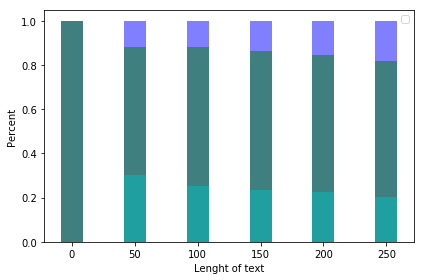

In [73]:
createPlotTextLength(result_df)

In [74]:
def devide(number):
    return number/2

def moreThenHalf(result_df):
    result_df['half_wordsAfterLemmatisation'] = map(devide, result_df['wordsAfterLemmatisation'])
    result_df['moreThenHalf'] = 0
    result_df['moreThenHalf'] = np.where(((result_df['wordsFound'] >= result_df['half_wordsAfterLemmatisation']) & (result_df['half_wordsAfterLemmatisation'] > 0) & (result_df['wordsFound'] > 0)), 1 , 0)
    return result_df

In [75]:
tym = moreThenHalf(result_df)
tym.groupby('moreThenHalf').size()
review_less = tym.loc[tym['moreThenHalf'] == 1]
review_less['correct_guess'] = review_less['detectedEmotion'] == review_less['emotion']
review_less.groupby('correct_guess').size()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


correct_guess
False     18
True     121
dtype: int64

In [76]:
result = result_df.round({'rate': 0})
grouped = result.groupby('rate', as_index=False).mean()

In [78]:
grouped

,rate,level_0,index,resultOfDetecting,words,wordsAfterLemmatisation,wordsFound,correct_guess,score,text_length_bin,half_wordsAfterLemmatisation,moreThenHalf
0,1.0,4724.431111,2189.871111,-0.055613,39.124444,31.973333,6.817778,0.804444,0.804444,4.240000,15.986667,0.004444
1,2.0,4300.696154,2048.365385,-0.028261,40.303846,33.642308,7.588462,0.661538,0.661538,4.380769,16.821154,0.003846
2,3.0,4049.860656,2001.672131,-0.001157,37.251366,31.101093,7.453552,0.542350,0.542350,4.000000,15.550546,0.001366
3,4.0,3766.624933,1916.766325,0.065841,32.963303,28.033459,7.333513,0.701565,0.701565,3.500270,14.016730,0.016190
4,5.0,3067.703040,1578.912705,0.091317,31.517537,26.588984,7.326578,0.771369,0.771369,3.338529,13.294492,0.027540


In [115]:
newresult = changeRangeOfComments(4, 8, result_df)

In [116]:
getResults(newresult)

correct_guess
False     886
True     1596
dtype: int64

In [118]:
len(newresult.loc[newresult['correct_guess'] == True])*100/len(newresult)

64

In [56]:
len(result_df)

6919

In [29]:
grouped = result_df.groupby('text_length_bin', as_index=False).mean()

In [30]:
grouped

,text_length_bin,index,rate,resultOfDetecting,words,wordsAfterLemmatisation,wordsFound,correct_guess,score
0,0.0,3842.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1,1.0,1807.955752,4.637168,0.161356,13.168142,11.548673,3.893805,0.761062,0.761062
2,2.0,1939.712853,4.412944,0.092230,19.468551,17.262534,4.824066,0.711030,0.711030
3,3.0,1972.709677,4.262097,0.055038,29.263441,25.434140,6.692204,0.659946,0.659946
4,4.0,1861.604341,4.105175,0.042250,39.242070,33.268781,8.580968,0.664441,0.664441
5,5.0,1926.154734,3.735951,0.016874,45.000000,36.891455,8.802925,0.569669,0.569669
